## Laboratorium 5 - Klasyfikacja

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier

### Algorytm KNN

Własny algorytm knn:
k= 1 -> Train Accuracy: 1.0000, Test Accuracy: 0.9333
k= 3 -> Train Accuracy: 0.9429, Test Accuracy: 0.9000
k= 5 -> Train Accuracy: 0.9000, Test Accuracy: 0.9333
k= 7 -> Train Accuracy: 0.9286, Test Accuracy: 0.9667
k= 9 -> Train Accuracy: 0.8857, Test Accuracy: 1.0000
k=11 -> Train Accuracy: 0.8857, Test Accuracy: 1.0000
k=13 -> Train Accuracy: 0.8857, Test Accuracy: 0.9667
k=15 -> Train Accuracy: 0.8857, Test Accuracy: 0.9333
k=17 -> Train Accuracy: 0.8714, Test Accuracy: 0.9667
k=19 -> Train Accuracy: 0.8857, Test Accuracy: 1.0000


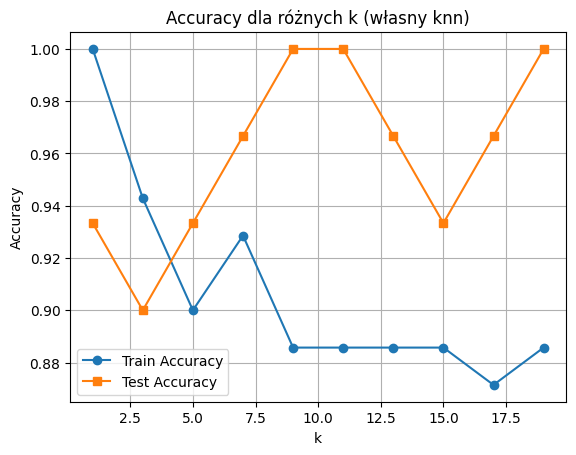

In [2]:
# =============================
# CZĘŚĆ 1: PRACA NA ZBIORZE ADMISSION
# =============================

# Wczytanie danych z pliku admission.txt
data = []
with open('./admission.txt', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        # Każdy wiersz: x1, x2, label
        data.append([float(row[0]), float(row[1]), float(row[2])])
data = np.array(data)
X = data[:, :2]
y = data[:, 2]

# Podział na zbiór uczący i testowy (test_size=30%, random_state = 12345)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

# Własna implementacja funkcji classify
def classify(X_train, y_train, example, k):
    """
    :param X_train: zbiór uczący (m, n)
    :param y_train: etykiety (m,)
    :param example: wektor cech przykładu (n,)
    :param k: liczba sąsiadów
    :return: predykcja klasy (0 lub 1)
    """
    # Obliczenie euklidesowych odległości między example a wszystkimi punktami zbioru uczącego
    distances = np.sqrt(np.sum((X_train - example)**2, axis=1))
    # Posortowanie indeksów według rosnącej odległości
    sorted_indices = np.argsort(distances)
    # Pobranie etykiet k najbliższych sąsiadów
    k_labels = y_train[sorted_indices][:k]
    # Głosowanie większościowe – ponieważ etykiety są 0 lub 1, sumując je uzyskujemy liczbę głosów na klasę 1.
    # Przy nieparzystym k nie ma remisu.
    return 1 if np.sum(k_labels) >= k/2 else 0

# Ocena własnego klasyfikatora knn dla różnych wartości k
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
train_acc = []
test_acc = []

print("Własny algorytm knn:")
for k in k_values:
    # Predykcja na zbiorze uczącym
    y_pred_train = np.array([classify(x_train, y_train, ex, k) for ex in x_train])
    acc_train = np.mean(y_pred_train == y_train)
    train_acc.append(acc_train)
    
    # Predykcja na zbiorze testowym
    y_pred_test = np.array([classify(x_train, y_train, ex, k) for ex in x_test])
    acc_test = np.mean(y_pred_test == y_test)
    test_acc.append(acc_test)
    
    print(f"k={k:2d} -> Train Accuracy: {acc_train:.4f}, Test Accuracy: {acc_test:.4f}")

# Wykres accuracy w zależności od k
plt.figure()
plt.plot(k_values, train_acc, marker='o', label='Train Accuracy')
plt.plot(k_values, test_acc, marker='s', label='Test Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy dla różnych k (własny knn)')
plt.legend()
plt.grid(True)
plt.show()

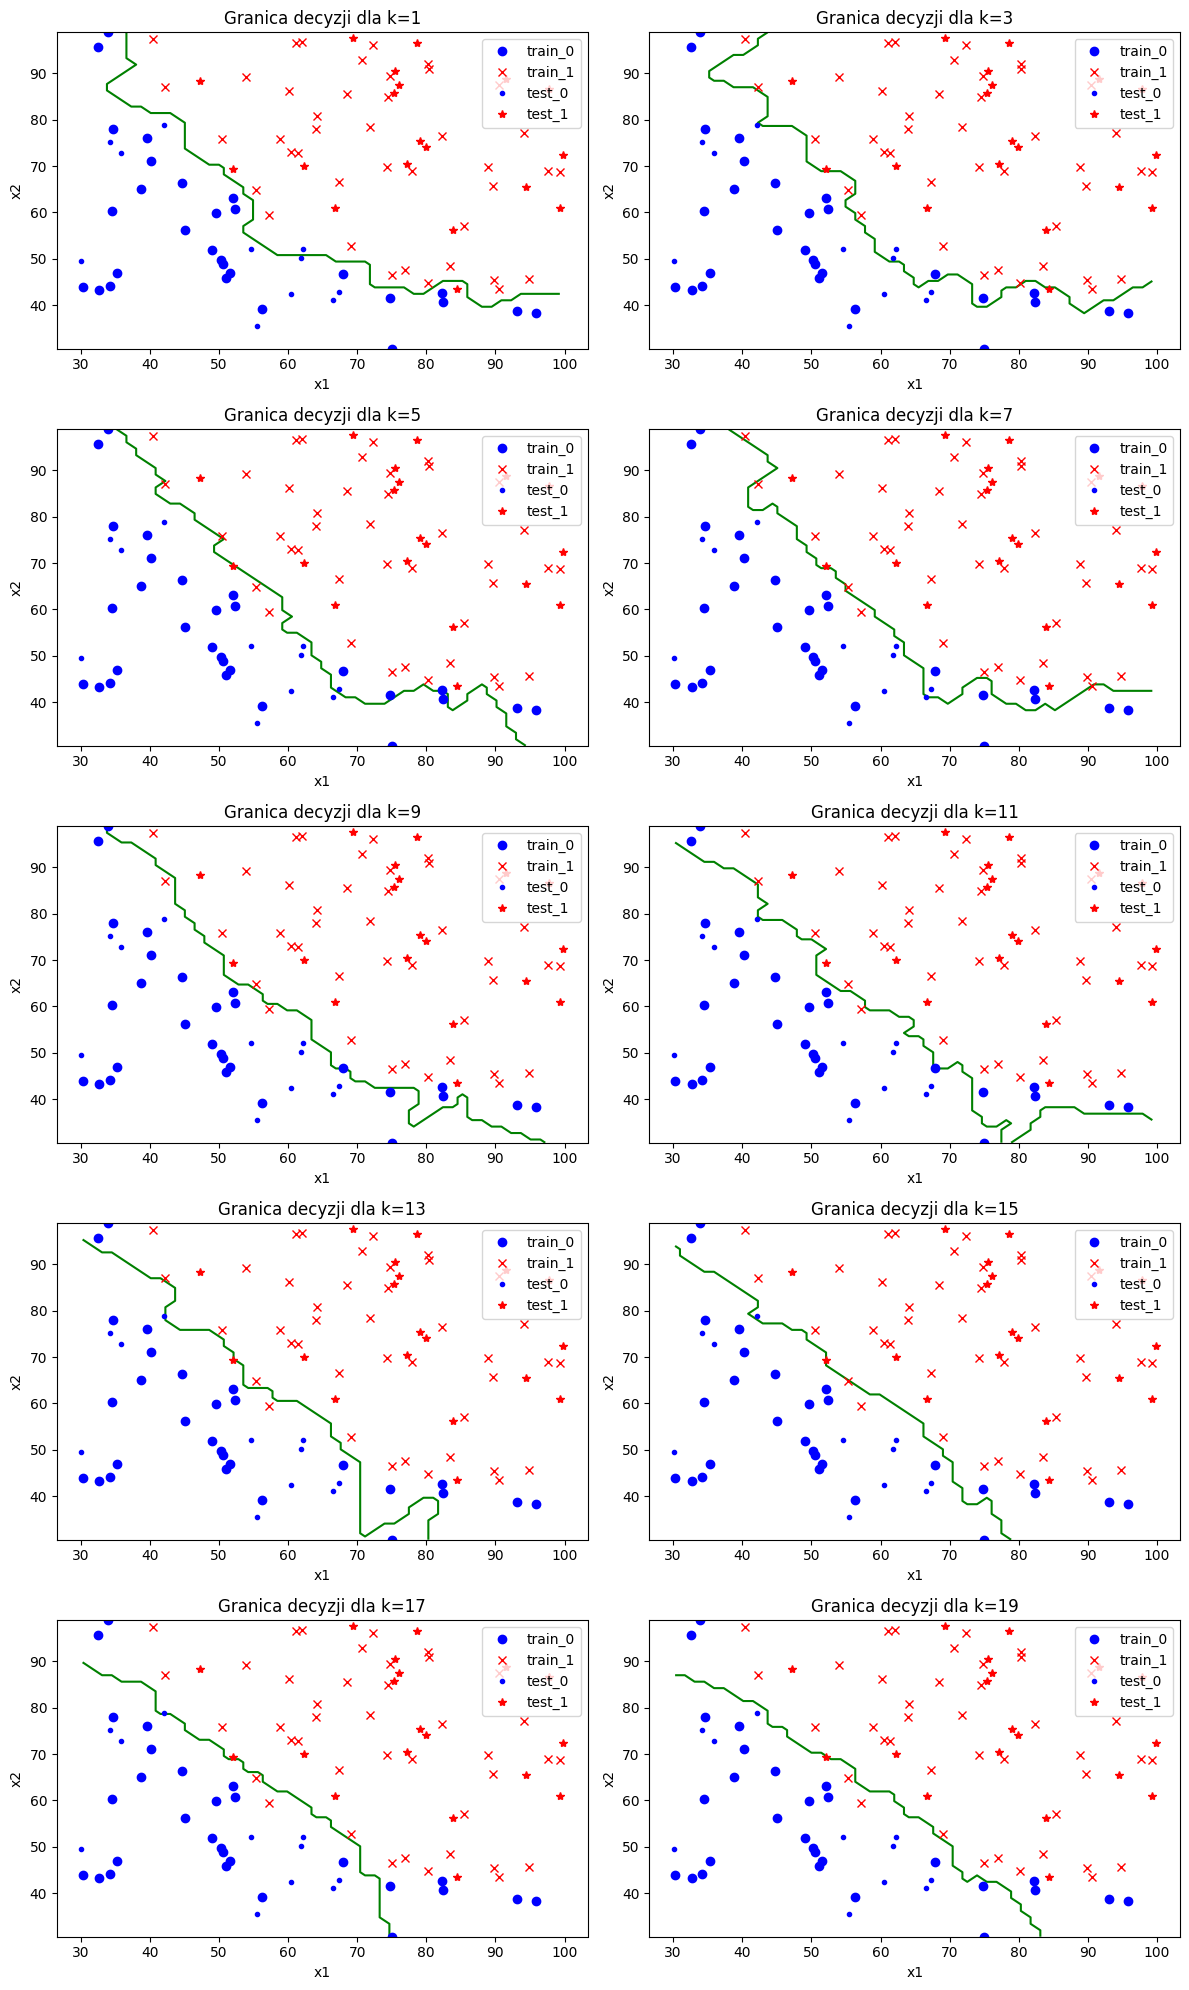

In [3]:
# # Wizualizacja granicy decyzji dla każdego k
# for k in k_values:
#     plt.figure(figsize=(5, 5))
#     plt.title(f'Granica decyzji dla k={k}')
#     plt.xlabel('x1')
#     plt.ylabel('x2')
#     # Przygotowanie siatki punktów do wykresu konturowego
#     x1_res = 50
#     x2_res = 50
#     x1_vals = np.linspace(x_train[:, 0].min(), x_train[:, 0].max(), x1_res)
#     x2_vals = np.linspace(x_train[:, 1].min(), x_train[:, 1].max(), x2_res)
#     x1_mesh, x2_mesh = np.meshgrid(x1_vals, x2_vals)
#     labels_space = np.zeros((x2_res, x1_res))
    
#     # Dla każdego punktu siatki dokonaj predykcji
#     for i in range(x2_res):
#         for j in range(x1_res):
#             example = np.array([x1_vals[j], x2_vals[i]])
#             pred = classify(x_train, y_train, example, k)
#             labels_space[i, j] = pred

#     # Rysowanie granicy decyzji (poziom 0.5)
#     plt.contour(x1_mesh, x2_mesh, labels_space, levels=[0.5], colors='g')
    
#     # Rysowanie punktów zbioru uczącego
#     plt.plot(x_train[y_train==0, 0], x_train[y_train==0, 1], 'bo', label='train_0')
#     plt.plot(x_train[y_train==1, 0], x_train[y_train==1, 1], 'rx', label='train_1')
#     # Rysowanie punktów zbioru testowego
#     plt.plot(x_test[y_test==0, 0], x_test[y_test==0, 1], 'b.', label='test_0')
#     plt.plot(x_test[y_test==1, 0], x_test[y_test==1, 1], 'r*', label='test_1')
    
#     plt.legend()
#     plt.show()

fig, axes = plt.subplots(5, 2, figsize=(12, 20))
axes = axes.flatten()

for idx, k in enumerate(k_values):
    ax = axes[idx]
    ax.set_title(f'Granica decyzji dla k={k}')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    
    # Przygotowanie siatki punktów do wykresu konturowego
    x1_res = 50
    x2_res = 50
    x1_vals = np.linspace(x_train[:, 0].min(), x_train[:, 0].max(), x1_res)
    x2_vals = np.linspace(x_train[:, 1].min(), x_train[:, 1].max(), x2_res)
    x1_mesh, x2_mesh = np.meshgrid(x1_vals, x2_vals)
    labels_space = np.zeros((x2_res, x1_res))
    
    # Dla każdego punktu siatki dokonaj predykcji
    for i in range(x2_res):
        for j in range(x1_res):
            example = np.array([x1_vals[j], x2_vals[i]])
            pred = classify(x_train, y_train, example, k)
            labels_space[i, j] = pred

    # Rysowanie granicy decyzji (poziom 0.5)
    ax.contour(x1_mesh, x2_mesh, labels_space, levels=[0.5], colors='g')
    
    # Rysowanie punktów zbioru uczącego
    ax.plot(x_train[y_train == 0, 0], x_train[y_train == 0, 1], 'bo', label='train_0')
    ax.plot(x_train[y_train == 1, 0], x_train[y_train == 1, 1], 'rx', label='train_1')
    # Rysowanie punktów zbioru testowego
    ax.plot(x_test[y_test == 0, 0], x_test[y_test == 0, 1], 'b.', label='test_0')
    ax.plot(x_test[y_test == 1, 0], x_test[y_test == 1, 1], 'r*', label='test_1')
    
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [4]:
# Wybór najlepszego modelu na podstawie wykresu (przykładowo k=7)
best_k = 7
y_pred_best = np.array([classify(x_train, y_train, ex, best_k) for ex in x_test])
acc_best = np.mean(y_pred_best == y_test)
print(f"\nNajlepszy model (k={best_k}) -> Test Accuracy: {acc_best:.4f}")

# Obliczanie czułości (sensitivity) i precision (pp) dla klasy 1
TP = np.sum((y_test == 1) & (y_pred_best == 1))
FN = np.sum((y_test == 1) & (y_pred_best == 0))
FP = np.sum((y_test == 0) & (y_pred_best == 1))
sensitivity = TP / (TP + FN) if (TP+FN) > 0 else 0
precision = TP / (TP + FP) if (TP+FP) > 0 else 0
print(f"Dla k={best_k}: Sensitivity = {sensitivity:.4f}, Precision = {precision:.4f}")


Najlepszy model (k=7) -> Test Accuracy: 0.9667
Dla k=7: Sensitivity = 1.0000, Precision = 0.9500



KNN z scikit-learn (dla zbioru admission):
k= 1 -> Test Accuracy: 0.9333
k= 3 -> Test Accuracy: 0.9000
k= 5 -> Test Accuracy: 0.9333
k= 7 -> Test Accuracy: 0.9667
k= 9 -> Test Accuracy: 1.0000
k=11 -> Test Accuracy: 1.0000
k=13 -> Test Accuracy: 0.9667
k=15 -> Test Accuracy: 0.9333
k=17 -> Test Accuracy: 0.9667
k=19 -> Test Accuracy: 1.0000


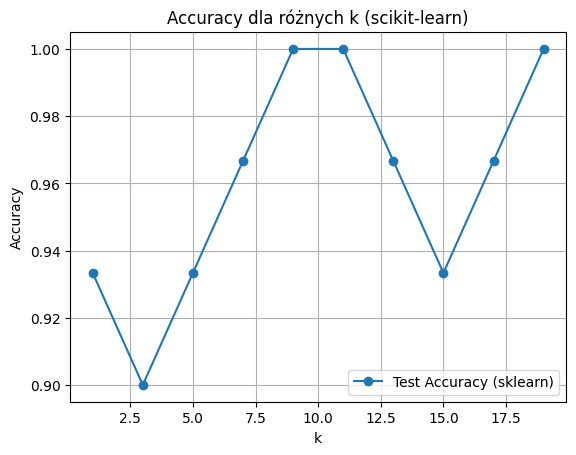

In [5]:
# =============================
# CZĘŚĆ 2: KLASYFIKATOR Z BIBLIOTEKI scikit-learn
# =============================

print("\nKNN z scikit-learn (dla zbioru admission):")
acc_test_sklearn = []
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(x_train, y_train)
    y_pred = knn_classifier.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    acc_test_sklearn.append(acc)
    print(f"k={k:2d} -> Test Accuracy: {acc:.4f}")

plt.figure()
plt.plot(k_values, acc_test_sklearn, marker='o', label='Test Accuracy (sklearn)')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy dla różnych k (scikit-learn)')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# =============================
# CZĘŚĆ 3: ZBIÓR DIGITS
# =============================

# Wczytanie zbioru digits
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

# Podział na zbiór uczący i testowy (70% - 30%)
x_train_d, x_test_d, y_train_d, y_test_d = train_test_split(X_digits, y_digits, test_size=0.3, random_state=12345)

acc_test_digits = []
print("\nKNN z scikit-learn (dla zbioru digits):")
for k in k_values:
    knn_d = KNeighborsClassifier(n_neighbors=k)
    knn_d.fit(x_train_d, y_train_d)
    y_pred_d = knn_d.predict(x_test_d)
    acc = accuracy_score(y_test_d, y_pred_d)
    acc_test_digits.append(acc)
    print(f"k={k:2d} -> Test Accuracy: {acc:.4f}")


KNN z scikit-learn (dla zbioru digits):
k= 1 -> Test Accuracy: 0.9981
k= 3 -> Test Accuracy: 0.9944
k= 5 -> Test Accuracy: 0.9926
k= 7 -> Test Accuracy: 0.9907
k= 9 -> Test Accuracy: 0.9889
k=11 -> Test Accuracy: 0.9870
k=13 -> Test Accuracy: 0.9852
k=15 -> Test Accuracy: 0.9852
k=17 -> Test Accuracy: 0.9796
k=19 -> Test Accuracy: 0.9722


In [7]:
# Wybór najlepszego k dla zbioru digits
best_k_digits = k_values[np.argmax(acc_test_digits)]
print(f"\nNajlepsze k dla digits: {best_k_digits} z accuracy: {max(acc_test_digits):.4f}")


Najlepsze k dla digits: 1 z accuracy: 0.9981


In [8]:
# Obliczenie raportu klasyfikacji oraz macierzy konfuzji dla najlepszego modelu
knn_best_digits = KNeighborsClassifier(n_neighbors=best_k_digits)
knn_best_digits.fit(x_train_d, y_train_d)
y_pred_best_digits = knn_best_digits.predict(x_test_d)

print("\nRaport klasyfikacji dla zbioru digits:")
print(classification_report(y_test_d, y_pred_best_digits))


Raport klasyfikacji dla zbioru digits:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       0.98      1.00      0.99        54
           2       1.00      1.00      1.00        48
           3       1.00      1.00      1.00        49
           4       1.00      1.00      1.00        67
           5       1.00      1.00      1.00        46
           6       1.00      1.00      1.00        63
           7       1.00      1.00      1.00        44
           8       1.00      0.98      0.99        57
           9       1.00      1.00      1.00        55

    accuracy                           1.00       540
   macro avg       1.00      1.00      1.00       540
weighted avg       1.00      1.00      1.00       540



In [9]:
print("Macierz konfuzji dla zbioru digits:")
print(confusion_matrix(y_test_d, y_pred_best_digits))

Macierz konfuzji dla zbioru digits:
[[57  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 48  0  0  0  0  0  0  0]
 [ 0  0  0 49  0  0  0  0  0  0]
 [ 0  0  0  0 67  0  0  0  0  0]
 [ 0  0  0  0  0 46  0  0  0  0]
 [ 0  0  0  0  0  0 63  0  0  0]
 [ 0  0  0  0  0  0  0 44  0  0]
 [ 0  1  0  0  0  0  0  0 56  0]
 [ 0  0  0  0  0  0  0  0  0 55]]


### Drzewa decyzyjne

Drzewa decyzyjne - zbiór admission.txt
level: 1, test acc: 0.7, train acc: 0.8428571428571429
level: 2, test acc: 0.8333333333333334, train acc: 0.9428571428571428
level: 3, test acc: 0.8333333333333334, train acc: 0.9857142857142858
level: 4, test acc: 0.8333333333333334, train acc: 1.0
level: 5, test acc: 0.8333333333333334, train acc: 1.0


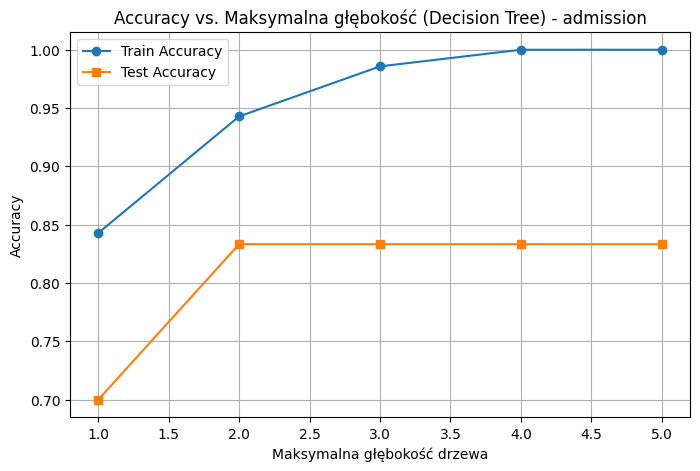

In [10]:
# ===============================
# CZĘŚĆ 1: ZBIÓR admission.txt
# ===============================

# Wczytanie danych z pliku admission.txt
data = []
with open('./admission.txt', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        # Każdy wiersz: x1, x2, label
        data.append([float(row[0]), float(row[1]), float(row[2])])
data = np.array(data)
X_admission = data[:, :2]
y_admission = data[:, 2]

# Podział danych na zbiór uczący i testowy (30% test, random_state=12345)
x_train_a, x_test_a, y_train_a, y_test_a = train_test_split(X_admission, y_admission, test_size=0.3, random_state=12345)

# Trening drzew decyzyjnych dla różnych maksymalnych głębokości
max_depth_values = [1, 2, 3, 4, 5]
train_acc = []
test_acc = []

print("Drzewa decyzyjne - zbiór admission.txt")
for depth in max_depth_values:
    tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=12345)
    tree_clf.fit(x_train_a, y_train_a)
    
    y_train_pred = tree_clf.predict(x_train_a)
    y_test_pred = tree_clf.predict(x_test_a)
    
    acc_train = accuracy_score(y_train_a, y_train_pred)
    acc_test = accuracy_score(y_test_a, y_test_pred)
    
    train_acc.append(acc_train)
    test_acc.append(acc_test)
    
    print(f"level: {depth}, test acc: {acc_test}, train acc: {acc_train}")

# Wykres skuteczności (accuracy) w zależności od maksymalnej głębokości drzewa
plt.figure(figsize=(8, 5))
plt.plot(max_depth_values, train_acc, marker='o', label='Train Accuracy')
plt.plot(max_depth_values, test_acc, marker='s', label='Test Accuracy')
plt.xlabel('Maksymalna głębokość drzewa')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Maksymalna głębokość (Decision Tree) - admission')
plt.legend(loc='best')
plt.grid(True)
plt.show()


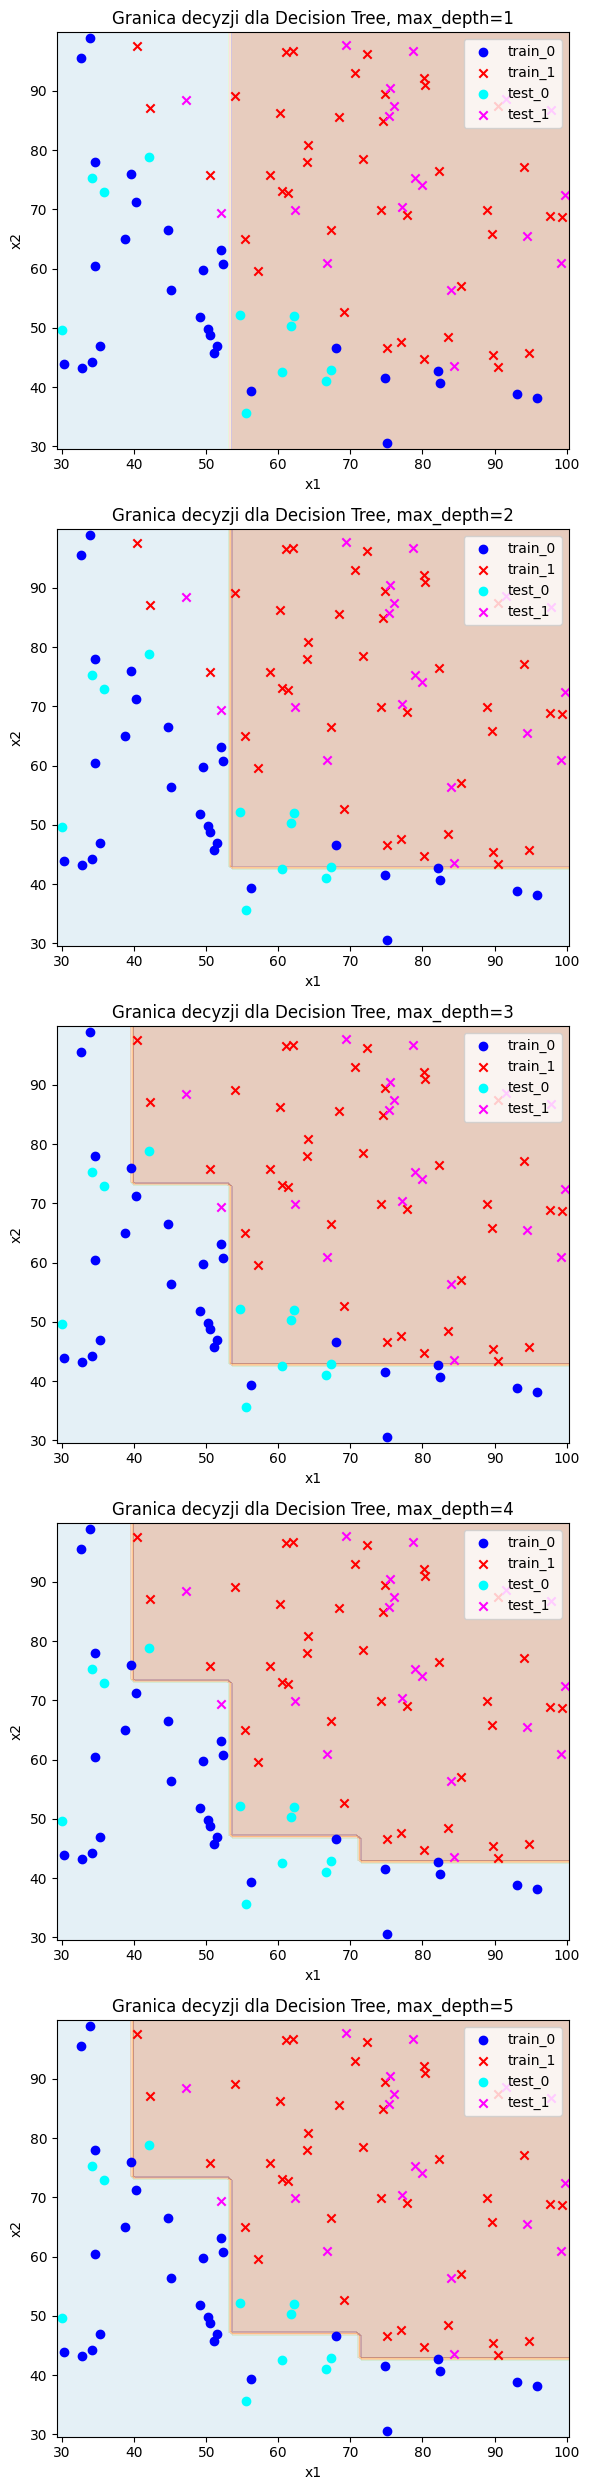

In [11]:
# Wizualizacja granicy decyzji dla modeli z różnymi głębokościami
fig, axes = plt.subplots(len(max_depth_values), 1, figsize=(6, 5 * len(max_depth_values)))
if len(max_depth_values) == 1:
    axes = [axes]
for idx, depth in enumerate(max_depth_values):
    ax = axes[idx]
    tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=12345)
    tree_clf.fit(x_train_a, y_train_a)
    
    ax.set_title(f'Granica decyzji dla Decision Tree, max_depth={depth}')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    
    # Przygotowanie siatki punktów
    x1_min, x1_max = x_train_a[:, 0].min() - 1, x_train_a[:, 0].max() + 1
    x2_min, x2_max = x_train_a[:, 1].min() - 1, x_train_a[:, 1].max() + 1
    x1_vals = np.linspace(x1_min, x1_max, 100)
    x2_vals = np.linspace(x2_min, x2_max, 100)
    x1_mesh, x2_mesh = np.meshgrid(x1_vals, x2_vals)
    mesh_points = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]
    
    # Predykcje na siatce
    mesh_preds = tree_clf.predict(mesh_points)
    mesh_preds = mesh_preds.reshape(x1_mesh.shape)
    
    # Wypełnienie obszaru kolorami według klasy
    ax.contourf(x1_mesh, x2_mesh, mesh_preds, alpha=0.3, cmap=plt.cm.Paired)
    
    # Rysowanie punktów zbioru uczącego
    ax.scatter(x_train_a[y_train_a == 0, 0], x_train_a[y_train_a == 0, 1], c='blue', marker='o', label='train_0')
    ax.scatter(x_train_a[y_train_a == 1, 0], x_train_a[y_train_a == 1, 1], c='red', marker='x', label='train_1')
    # Rysowanie punktów zbioru testowego
    ax.scatter(x_test_a[y_test_a == 0, 0], x_test_a[y_test_a == 0, 1], c='cyan', marker='o', label='test_0')
    ax.scatter(x_test_a[y_test_a == 1, 0], x_test_a[y_test_a == 1, 1], c='magenta', marker='x', label='test_1')
    
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [12]:
# ===============================
# CZĘŚĆ 2: ZBIÓR digits
# ===============================

print("\nDrzewa decyzyjne - zbiór digits")
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

x_train_d, x_test_d, y_train_d, y_test_d = train_test_split(X_digits, y_digits, test_size=0.3, random_state=12345)

# Trening modeli dla różnych maksymalnych głębokości (np. od 1 do 20)
max_depth_range = range(1, 21)
acc_digits = []

for depth in max_depth_range:
    dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=12345)
    dt_clf.fit(x_train_d, y_train_d)
    y_test_pred = dt_clf.predict(x_test_d)
    acc = accuracy_score(y_test_d, y_test_pred)
    acc_digits.append(acc)
    print(f"max_depth: {depth}, test acc: {acc}")


Drzewa decyzyjne - zbiór digits
max_depth: 1, test acc: 0.19814814814814816
max_depth: 2, test acc: 0.2962962962962963
max_depth: 3, test acc: 0.5166666666666667
max_depth: 4, test acc: 0.737037037037037
max_depth: 5, test acc: 0.8314814814814815
max_depth: 6, test acc: 0.8833333333333333
max_depth: 7, test acc: 0.8907407407407407
max_depth: 8, test acc: 0.8833333333333333
max_depth: 9, test acc: 0.8796296296296297
max_depth: 10, test acc: 0.8851851851851852
max_depth: 11, test acc: 0.8851851851851852
max_depth: 12, test acc: 0.8851851851851852
max_depth: 13, test acc: 0.8851851851851852
max_depth: 14, test acc: 0.8851851851851852
max_depth: 15, test acc: 0.8851851851851852
max_depth: 16, test acc: 0.8851851851851852
max_depth: 17, test acc: 0.8851851851851852
max_depth: 18, test acc: 0.8851851851851852
max_depth: 19, test acc: 0.8851851851851852
max_depth: 20, test acc: 0.8851851851851852


In [13]:
# Wybór najlepszego modelu
best_depth = max_depth_range[np.argmax(acc_digits)]
best_accuracy = max(acc_digits)
print(f"\nNajlepszy model dla digits: max_depth = {best_depth}, test accuracy = {best_accuracy}")


Najlepszy model dla digits: max_depth = 7, test accuracy = 0.8907407407407407


In [14]:
# Generowanie raportu klasyfikacji i macierzy konfuzji dla najlepszego modelu
best_dt = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth, random_state=12345)
best_dt.fit(x_train_d, y_train_d)
y_pred_best = best_dt.predict(x_test_d)

print("\nRaport klasyfikacji dla zbioru digits:")
print(classification_report(y_test_d, y_pred_best))



Raport klasyfikacji dla zbioru digits:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        57
           1       0.84      0.91      0.88        54
           2       0.88      0.96      0.92        48
           3       0.85      0.90      0.87        49
           4       0.85      0.85      0.85        67
           5       0.87      0.87      0.87        46
           6       0.98      0.89      0.93        63
           7       0.89      0.95      0.92        44
           8       0.84      0.82      0.83        57
           9       0.98      0.84      0.90        55

    accuracy                           0.89       540
   macro avg       0.89      0.89      0.89       540
weighted avg       0.89      0.89      0.89       540



In [15]:
print("Macierz konfuzji dla zbioru digits:")
print(confusion_matrix(y_test_d, y_pred_best))

Macierz konfuzji dla zbioru digits:
[[54  0  0  0  2  0  1  0  0  0]
 [ 0 49  1  0  1  1  0  1  1  0]
 [ 0  0 46  0  1  0  0  0  1  0]
 [ 0  0  1 44  0  0  0  1  2  1]
 [ 0  1  0  4 57  0  0  2  3  0]
 [ 1  3  0  1  1 40  0  0  0  0]
 [ 3  2  1  0  1  0 56  0  0  0]
 [ 0  0  0  0  1  0  0 42  1  0]
 [ 0  3  3  0  1  3  0  0 47  0]
 [ 0  0  0  3  2  2  0  1  1 46]]


### Implementacja algorytmu generowania drzew decyzyjnych (zadanie dodatkowe)

In [16]:
# 1. Definicja entropii
def calculate_entropy(p):
    """
    Oblicza entropię dla prawdopodobieństwa p (klasa=1).
    """
    if p == 0 or p == 1:
        return 0
    else:
        return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

# 2. Funkcja licząca Information Gain
def calculate_ig(x, y, feature_idx, example_indices, thresh):
    """
    :param x: macierz przykładów (m x n)
    :param y: wektor etykiet (m, ) z wartościami 0 lub 1
    :param feature_idx: indeks cechy, względem której dokonujemy podziału
    :param example_indices: lista indeksów przykładów (podzbiór zbioru)
    :param thresh: próg dla danej cechy, względem którego dokonujemy podziału
    :return: (IG, left_branch_examples, right_branch_examples)
    """
    # Obliczanie entropii rodzica
    parent_labels = y[example_indices]
    p = np.mean(parent_labels)
    parent_entropy = calculate_entropy(p)
    
    # Podział przykładów na lewą i prawą gałąź
    left_branch_examples = []
    right_branch_examples = []
    for i in example_indices:
        if x[i, feature_idx] < thresh:
            left_branch_examples.append(i)
        else:
            right_branch_examples.append(i)
    
    n_total = len(example_indices)
    n_left = len(left_branch_examples)
    n_right = len(right_branch_examples)
    
    # Ułamek przykładów w gałęziach
    w_left = n_left / n_total if n_total > 0 else 0
    w_right = n_right / n_total if n_total > 0 else 0
    
    # Obliczenie proporcji klasy 1 w obu gałęziach (jeśli są niepuste)
    p_left = np.mean(y[left_branch_examples]) if n_left > 0 else 0
    p_right = np.mean(y[right_branch_examples]) if n_right > 0 else 0
    
    left_entropy = calculate_entropy(p_left)
    right_entropy = calculate_entropy(p_right)
    
    # Entropia ważona
    weighted_entropy = w_left * left_entropy + w_right * right_entropy
    
    # Information Gain
    ig = parent_entropy - weighted_entropy
    return ig, left_branch_examples, right_branch_examples

# Przykładowe wywołanie dla testowych danych
x_ig_test = np.array([
    [0, 2],
    [1, 1],
    [2, 1],
    [1, 2],
    [2, 2],
    [2, 3],
])
y_ig_test = np.array([0, 0, 0, 1, 1, 1])
feature_idx = 1
thresh = 1.1
example_indices = [0, 1, 2, 3, 4]  # bierzemy tylko pierwsze 5 przykładów
ig_test, left_branch, right_branch = calculate_ig(x_ig_test, y_ig_test, feature_idx, example_indices, thresh)
print("Test IG:", ig_test)  # Oczekiwany wynik: około 0.4199730940219749

Test IG: 0.4199730940219749


In [17]:
# 3. Definicja klasy reprezentującej węzeł drzewa
class Node:
    def __init__(self, feature_idx, thresh, level):
        self.feature_idx = feature_idx  # indeks cechy użytej do podziału
        self.thresh = thresh            # próg podziału
        self.left = None                # lewa gałąź
        self.right = None               # prawa gałąź
        self.level = level              # poziom (głębokość) w drzewie

# 4. Funkcja rekurencyjna generująca drzewo decyzyjne
def find_best_split(x, y, example_indices, level_cap, level=0, ig_threshold=1e-6):
    """
    Rekurencyjna funkcja budująca drzewo decyzyjne.
    :param x: macierz przykładów (m x n)
    :param y: wektor etykiet (m, )
    :param example_indices: lista indeksów przykładów w aktualnym węźle
    :param level_cap: maksymalna głębokość drzewa
    :param level: aktualny poziom drzewa
    :param ig_threshold: minimalna wartość IG potrzebna do dalszego podziału
    :return: obiekt klasy Node lub wartość liścia (średnia etykiet)
    """
    # Warunki zatrzymania: osiągnięto maksymalną głębokość lub węzeł jest jednorodny
    current_labels = y[example_indices]
    if level >= level_cap or len(np.unique(current_labels)) == 1:
        return np.mean(current_labels)
    
    n_features = x.shape[1]
    best_ig = -np.inf
    best_feature = None
    best_thresh = None
    best_left_indices = None
    best_right_indices = None

    # Dla każdej cechy szukamy najlepszego progu
    for feature_idx in range(n_features):
        # Pobranie unikalnych wartości dla danej cechy w podzbiorze
        feature_values = np.sort(np.unique(x[example_indices, feature_idx]))
        # Jeśli cecha ma tylko jedną wartość, nie możemy dokonać podziału
        if len(feature_values) == 1:
            continue
        # Wyznaczamy kandydatów na próg jako średnią par kolejnych wartości
        for i in range(len(feature_values) - 1):
            thresh_candidate = (feature_values[i] + feature_values[i+1]) / 2.0
            ig, left_indices, right_indices = calculate_ig(x, y, feature_idx, example_indices, thresh_candidate)
            if ig > best_ig:
                best_ig = ig
                best_feature = feature_idx
                best_thresh = thresh_candidate
                best_left_indices = left_indices
                best_right_indices = right_indices

    # Jeśli nie znaleziono sensownego podziału, zwracamy liść
    if best_feature is None or best_ig < ig_threshold:
        return np.mean(current_labels)
    
    # Tworzymy węzeł i rekurencyjnie budujemy lewą i prawą gałąź
    node = Node(best_feature, best_thresh, level)
    node.left = find_best_split(x, y, best_left_indices, level_cap, level+1, ig_threshold)
    node.right = find_best_split(x, y, best_right_indices, level_cap, level+1, ig_threshold)
    return node

# 5. Funkcja przeszukująca drzewo w celu dokonania predykcji dla pojedynczego przykładu
def travers(node, example):
    """
    Rekurencyjna funkcja przeszukująca drzewo decyzyjne.
    :param node: obiekt klasy Node lub wartość liścia
    :param example: wektor cech przykładu
    :return: predykcja (prawdopodobieństwo klasy 1)
    """
    # Jeśli node nie jest instancją klasy Node, oznacza to liść
    if not isinstance(node, Node):
        return node
    if example[node.feature_idx] < node.thresh:
        return travers(node.left, example)
    else:
        return travers(node.right, example)

In [18]:
# ----------------------------------------
# Przykład użycia na zbiorze admission.txt
# ----------------------------------------

# Wczytanie danych z pliku admission.txt (plik powinien znajdować się w bieżącym katalogu)
data = []
with open('./admission.txt', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        # Każdy wiersz: x1, x2, label
        data.append([float(row[0]), float(row[1]), float(row[2])])
data = np.array(data)
X_admission = data[:, :2]
y_admission = data[:, 2]

# Podział danych na zbiór uczący i testowy (30% danych jako test, random_state = 12345)
x_train, x_test, y_train, y_test = train_test_split(X_admission, y_admission, test_size=0.3, random_state=12345)

# Budowanie drzewa – wybieramy maksymalną głębokość np. 3 (możesz modyfikować)
max_depth = 3
root_node = find_best_split(x_train, y_train, list(range(len(y_train))), max_depth)

# Dokonujemy predykcji dla zbioru testowego
y_pred = np.zeros(len(y_test))
for idx, example in enumerate(x_test):
    # Predykcję interpretujemy jako prawdopodobieństwo – zaokrąglamy do 0 lub 1
    y_pred[idx] = np.round(travers(root_node, example))

# Obliczamy accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy naszego drzewa decyzyjnego (max_depth={max_depth}): {acc:.4f}")


Accuracy naszego drzewa decyzyjnego (max_depth=3): 0.8333
